In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Задачи

1. Импортируйте библиотеку `pandas` как `pd`. Загрузите два датасета `user_data` и `logs`. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
1. Какой клиент совершил больше всего успешных операций? (`success == True`)
1. С какой платформы осуществляется наибольшее количество успешных операций?
1. Какую платформу предпочитают премиумные клиенты?
1. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
1. Постройте график распределения числа успешных операций
1. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя `sns.countplot` (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

### Описание данных

##### user_data:

- **client** – идентификатор пользователя
- **premium** – является ли клиент премиум
- **age** – возраст

##### logs:

- **client** – идентификатор пользователя
- **success** – результат (успех - 1, нет - 0)
- **platform** – платформа
- **time** – время в формате Unix

### 1
Импортируйте библиотеку `pandas` как `pd`. Загрузите два датасета `user_data` и `logs`. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

In [2]:
# Загружаем датасеты
user_data = pd.read_csv('3_user_data.csv')
logs = pd.read_csv('3_logs.csv', parse_dates=['time'])

In [3]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [4]:
# Размер
user_data.shape

(2954, 3)

In [5]:
# Типы данных
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [6]:
# Описательная статистика
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [7]:
# Проверяем наличие пропущенных данных
user_data.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [8]:
# Повторяем
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [9]:
# Размер датасета
logs.shape

(4500, 4)

In [10]:
# Типы данных
logs.dtypes

client       int64
success       bool
platform    object
time        object
dtype: object

In [11]:
# Описательная статистика
logs.describe(include='all')

,client,success,platform,time
count,4500.000000,4500,4500,4500
unique,NaN,2,3,4376
top,NaN,True,phone,1585429173
freq,NaN,3289,2753,3
mean,50998.758000,NaN,NaN,NaN
std,28374.472495,NaN,NaN,NaN
min,40.000000,NaN,NaN,NaN
25%,27056.500000,NaN,NaN,NaN
50%,52659.000000,NaN,NaN,NaN
75%,76001.250000,NaN,NaN,NaN


In [12]:
# Наличие пропущенных значений
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

**???** Сколько уникальных значений принимает переменная `platform`?

In [13]:
logs.platform.nunique()

3

### 2
Какой клиент совершил больше всего успешных операций? (`success == True`)

In [14]:
# Создаем рейтинг клиентов по количеству успешных заказов
top_cliens = (
              logs.query("success == True")
                  .groupby('client')['success']
                  .count()
                  .reset_index()
                  .rename(columns={"success": "success_number"})
)

In [15]:
# Получаем список клиентов, с максимальным числом заказов
max_success = top_cliens.success_number.max()                        # Чему равно максимальное значение успешных заказов
top_cliens.query("success_number == @max_success").client.to_list()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

### 3
С какой платформы осуществляется наибольшее количество успешных операций?

In [16]:
logs.platform.value_counts().idxmax()

'phone'

### 4
Какую платформу предпочитают премиумные клиенты?

In [17]:
# Объединяем датасеты
broad_logs = logs.merge(user_data)
broad_logs.head()

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25


In [18]:
(
    broad_logs
        .query("premium == True")
        .platform.value_counts()
        .idxmax()
)

'phone'

### 5
Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


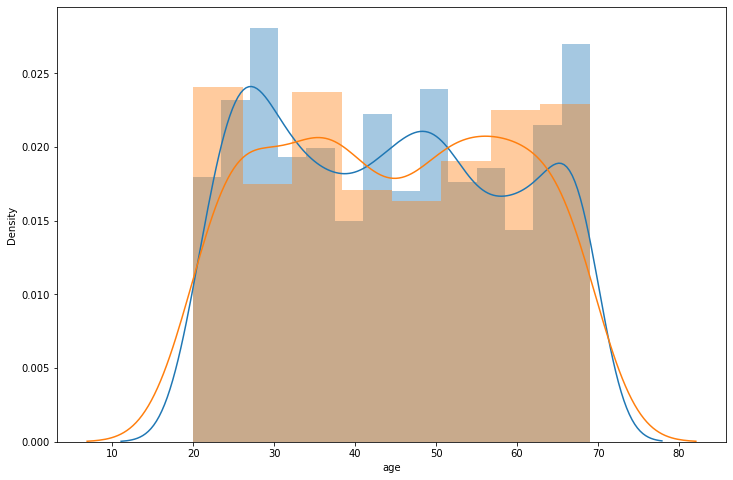

In [19]:
plt.figure(figsize=(12, 8))
sns.distplot(broad_logs.query("premium == False").age)
sns.distplot(broad_logs.query("premium == True").age)

### 6
Постройте график распределения числа успешных операций

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


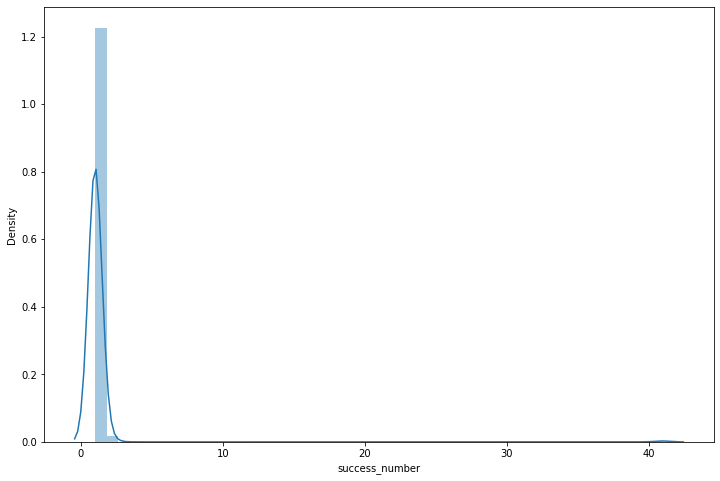

In [20]:
plt.figure(figsize=(12, 8))
sns.distplot(top_cliens.success_number)

### 7
Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя `sns.countplot` (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

In [21]:
# Готовим датафрейм "Успешных сделок на комьютере"
success_by_computer = broad_logs.query("platform == 'computer' and success == True")

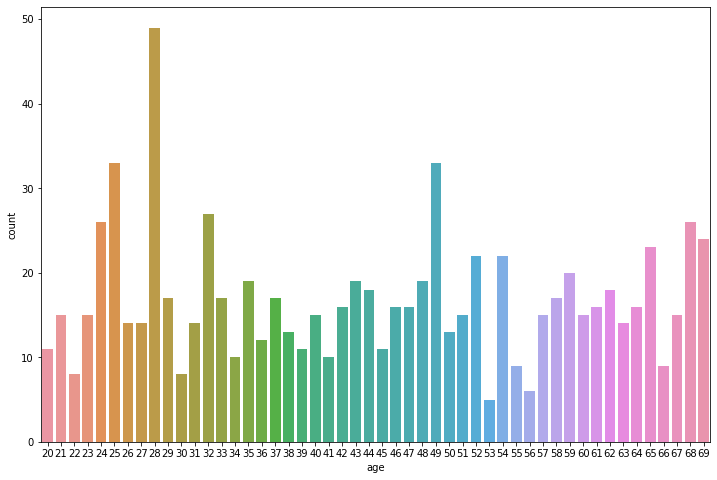

In [22]:
plt.figure(figsize=(12, 8))
sns.countplot(data=success_by_computer, x='age')